In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [3]:
os.chdir("D:\DataSet\FIFA") 
pd.set_option('display.max_columns', 50)

In [4]:
df_matches= pd.read_csv('matches_1930_2022.csv')
df_rank= pd.read_csv('fifa_ranking_2022-10-06.csv')
df_winners= pd.read_csv('world_cup.csv')

In [25]:
df = pd.concat([df_rank, df_matches], axis=0).reset_index()
df.shape

(1175, 52)

In [18]:
df.head(5)

,index,team,team_code,association,rank,previous_rank,points,previous_points,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,away_manager,away_captain,Attendance,Venue,Officials,Round,Date,...,Notes,Host,Year,home_goal,away_goal,home_goal_long,away_goal_long,home_own_goal,away_own_goal,home_penalty_goal,away_penalty_goal,home_penalty_miss_long,away_penalty_miss_long,home_penalty_shootout_goal_long,away_penalty_shootout_goal_long,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,0,Brazil,BRA,CONMEBOL,1.0,1.0,1841.30,1837.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Belgium,BEL,UEFA,2.0,2.0,1816.71,1821.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Argentina,ARG,CONMEBOL,3.0,3.0,1773.88,1770.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,France,FRA,UEFA,4.0,4.0,1759.78,1764.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,England,ENG,UEFA,5.0,5.0,1728.47,1737.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.tail(5)

,index,team,team_code,association,rank,previous_rank,points,previous_points,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,away_manager,away_captain,Attendance,Venue,Officials,Round,Date,...,Notes,Host,Year,home_goal,away_goal,home_goal_long,away_goal_long,home_own_goal,away_own_goal,home_penalty_goal,away_penalty_goal,home_penalty_miss_long,away_penalty_miss_long,home_penalty_shootout_goal_long,away_penalty_shootout_goal_long,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
1170,959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,France,1.0,NaN,NaN,0.0,NaN,NaN,Francisco Olazar,Manuel Ferreira,Raoul Caudron,Alexandre Villaplane,23409.0,"Parque Central, Montevideo",Gilberto Rego (Referee) · Ulises Saucedo (AR1)...,Group stage,1930-07-15,...,NaN,Uruguay,1930.0,Luis Monti · 81,NaN,['81&rsquor;|1:0|Luis Monti'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yugoslavia,Brazil,2.0,NaN,NaN,1.0,NaN,NaN,Bosko Simonovic,Milutin Ivković,Pindaro De Carvalho,Preguinho,24059.0,"Parque Central, Montevideo",Anibal Tejada (Referee) · Ricardo Vallarino (A...,Group stage,1930-07-14,...,NaN,Uruguay,1930.0,Aleksandar Tirnanić · 21|Ivan Bek · 30,Preguinho · 62,"['21&rsquor;|1:0|Aleksandar Tirnanić', '30&rsq...",['62&rsquor;|2:1|Preguinho'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romania,Peru,3.0,NaN,NaN,1.0,NaN,NaN,Octav Luchide,Emerich Vogl,Francisco Bru,Plácido Galindo,2549.0,"Pocitos, Montevideo",Alberto Warnken (Referee) · Jean Langenus (AR1...,Group stage,1930-07-14,...,NaN,Uruguay,1930.0,Adalbert Deșu · 1|Constantin Stanciu · 79|Nico...,Luis de Souza Ferreira · 75,"['1&rsquor;|1:0|Adalbert Deșu', '79&rsquor;|2:...",['75&rsquor;|1:1|Luis de Souza Ferreira'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
1173,962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,Belgium,3.0,NaN,NaN,0.0,NaN,NaN,Bob Millar,Tom Florie,Hector Goetinck,Pierre Braine,18346.0,"Parque Central, Montevideo",Jose Macias (Referee) · Francisco Mateucci (AR...,Group stage,1930-07-13,...,NaN,Uruguay,1930.0,Bart McGhee · 23|Tom Florie · 45|Bert Patenaud...,NaN,"['23&rsquor;|1:0|Bart McGhee', '45&rsquor;|2:0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174,963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,Mexico,4.0,NaN,NaN,1.0,NaN,NaN,Raoul Caudron,Alexandre Villaplane,Juan Luque,Rafael Garza Gutiérrez,4444.0,"Pocitos, Montevideo",Domingo Lombardi (Referee) · Henry Cristophe (...,Group stage,1930-07-13,...,NaN,Uruguay,1930.0,Lucien Laurent · 19|Marcel Langiller · 40|Andr...,Juan Carreño · 70,"['19&rsquor;|1:0|Lucien Laurent', '40&rsquor;|...",['70&rsquor;|3:1|Juan Carreño'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_team = df.groupby('Year').agg(home=('home_team', list), away=('away_team', list))
df_team['teams'] = df_team.apply(lambda x: list(set(x['home']+x['away'])), axis=1)
df_team['#'] = df_team['teams'].apply(len)
df_team

,home,away,teams,#
Year,,,,
1930.0,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ...","[Uruguay, Chile, United States, Peru, Yugoslav...",13
1934.0,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp...","[Austria, Netherlands, United States, Sweden, ...",16
1938.0,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak...","[Norway, Poland, Dutch East Indies, Netherland...",15
1950.0,"[Sweden, Uruguay, Brazil, Uruguay, Brazil, Uru...","[Spain, Brazil, Spain, Sweden, Sweden, Spain, ...","[Uruguay, Chile, United States, Sweden, Yugosl...",13
1954.0,"[Germany, Austria, Hungary, Germany, Germany, ...","[Hungary, Uruguay, Uruguay, Austria, Yugoslavi...","[Uruguay, Türkiye, Austria, Yugoslavia, Korea ...",16
1958.0,"[Brazil, France, Sweden, Brazil, France, West ...","[Sweden, West Germany, West Germany, France, N...","[Scotland, Austria, Sweden, Czechoslovakia, Yu...",16
1962.0,"[Brazil, Chile, Brazil, Czechoslovakia, Chile,...","[Czechoslovakia, Yugoslavia, Chile, Yugoslavia...","[Uruguay, Colombia, Bulgaria, Chile, Yugoslavi...",16
1966.0,"[England, Portugal, England, West Germany, Por...","[West Germany, Soviet Union, Portugal, Soviet ...","[Uruguay, Italy, Bulgaria, Chile, Mexico, Engl...",16
1970.0,"[Brazil, West Germany, Italy, Brazil, Brazil, ...","[Italy, Uruguay, West Germany, Uruguay, Peru, ...","[Uruguay, Bulgaria, Peru, Sweden, Czechoslovak...",16


In [27]:
df_team_pivot = df_team['teams'].explode().reset_index().pivot('Year', 'teams', 'Year').T
df_team_pivot[df_team_pivot > 0] = 1
column_list = sorted(df_team.index, reverse=True)

df_team_pivot['times'] = df_team_pivot.sum(axis=1)
df_team_pivot = df_team_pivot.sort_values(['times']+column_list, ascending=[False]*(len(column_list)+1))

df_team_pivot.columns = [str(col)[:-2]+'\n'+str(col)[-2:] for col in column_list[::-1]] + ['times']
df_team_pivot.shape

(86, 23)

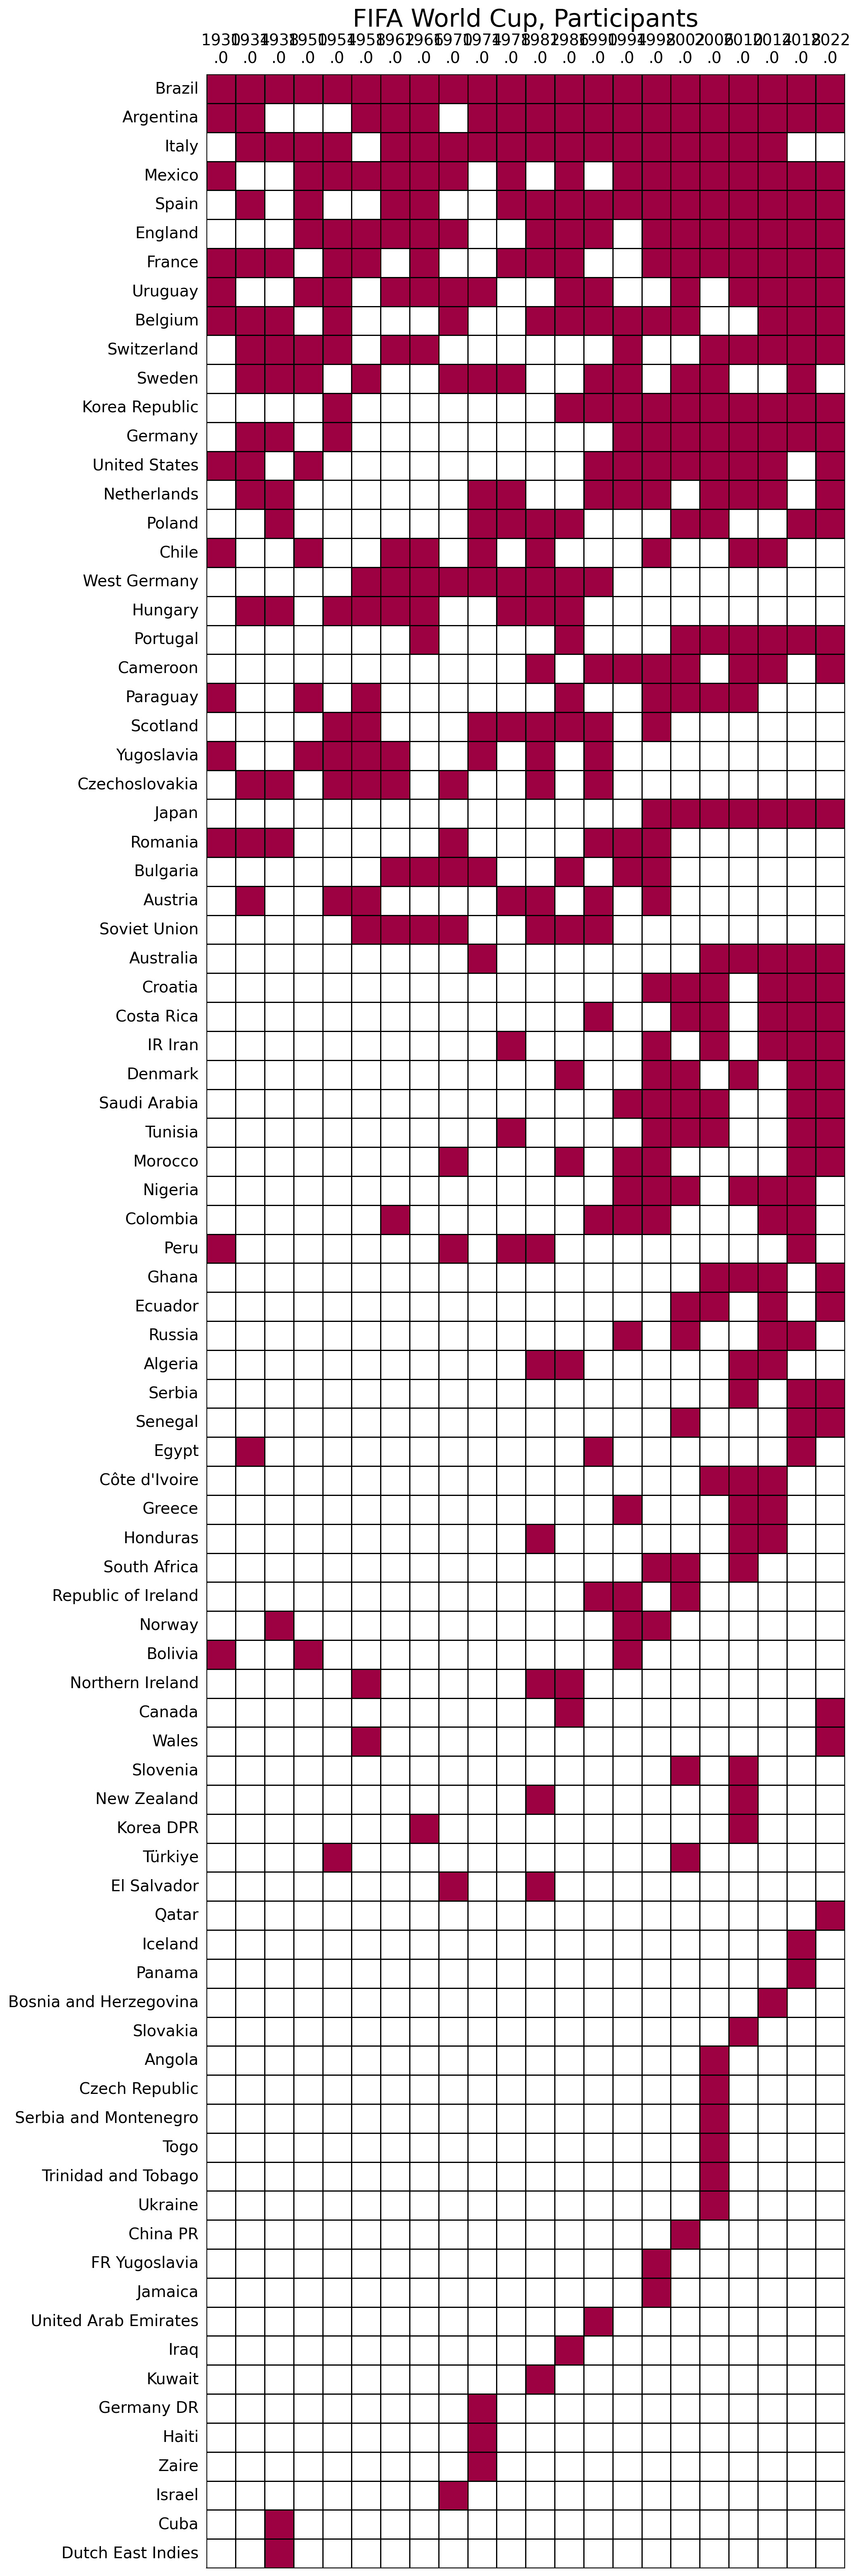

In [28]:
def plot_(data, title, size=(16,16), is_save=False):
    '''
    Return plot
    '''
    dpi = 200
    plt.figure(figsize=size, dpi=dpi)
    ax = sns.heatmap(data, annot=False, cbar=False, linewidths=0.5, 
                     linecolor='black', square=True, cmap='Spectral')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none') 
    ax.spines[['bottom', 'right']].set_visible(True)
    ax.set_title('{}'.format(title), size=22)
    plt.tight_layout()
    if is_save:
        plt.savefig('{}.png'.format(title.lower()))
    plt.show()
    
title = 'FIFA World Cup, Participants'
plot_(df_team_pivot.drop('times', axis=1), title=title, size=(12, 32), is_save=True)